# Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load Data

In [2]:
#데이터 읽어들이기
df = pd.read_csv('dataset/data2.csv')
print(df.shape)
df.head()

(100, 11)


,Unnamed: 0,Stain,Noise,Temperature,Size,Unnamed: 5,불량접수,Stain.1,Noise.1,Temperature.1,Size.1
0,14,99,0,12,93,NaN,불량#1,99.0,0.0,19.0,95.0
1,18,98,0,21,93,NaN,불량#2,86.0,1.0,28.0,93.0
2,30,97,0,15,94,NaN,불량#3,90.0,1.0,11.0,93.0
3,40,97,1,20,93,NaN,NaN,NaN,NaN,NaN,NaN
4,16,94,1,10,98,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#필요없는 행 삭제
df = df.drop(columns = ['Unnamed: 0','Unnamed: 5','불량접수','Stain.1','Noise.1','Temperature.1','Size.1'])
df.head()

,Stain,Noise,Temperature,Size
0,99,0,12,93
1,98,0,21,93
2,97,0,15,94
3,97,1,20,93
4,94,1,10,98


# EDA

## 1. 기본적인 데이터 정보 확인

In [4]:
print(df.shape)

(100, 4)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Stain        100 non-null    int64
 1   Noise        100 non-null    int64
 2   Temperature  100 non-null    int64
 3   Size         100 non-null    int64
dtypes: int64(4)
memory usage: 3.2 KB


In [6]:
df.describe()

,Stain,Noise,Temperature,Size
count,100.000000,100.000000,100.000000,100.000000
mean,50.410000,0.480000,20.010000,96.400000
std,29.593575,0.502117,6.355615,1.954017
min,2.000000,0.000000,10.000000,93.000000
25%,26.250000,0.000000,14.000000,95.000000
50%,47.500000,0.000000,20.000000,96.000000
75%,78.000000,1.000000,26.000000,98.000000
max,99.000000,1.000000,30.000000,100.000000


## 2. 각 칼럼별 데이터 분포 확인

### 2-1. Stain

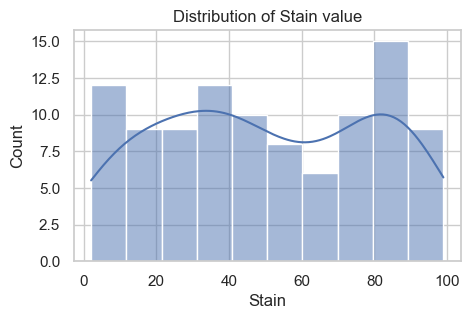

In [7]:
# Stain 칼럼의 히스토그램 그리기
sns.set(style="whitegrid")
plt.figure(figsize=(5, 3))
sns.histplot(df['Stain'], bins=10, kde=True)
plt.xlabel('Stain')
plt.ylabel('Count')
plt.title('Distribution of Stain value')
plt.show()

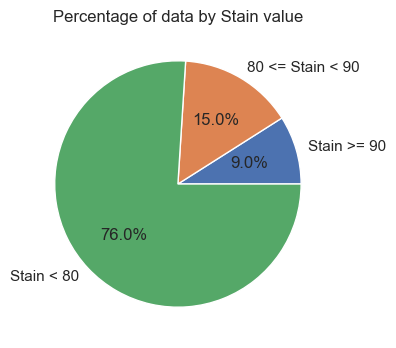

In [8]:
# 파이 차트 그리기
labels = ['Stain >= 90', '80 <= Stain < 90', 'Stain < 80']
sizes = [len(df[df['Stain'] >= 90]),
         len(df[(df['Stain'] >= 80) & (df['Stain'] < 90)]), 
         len(df[df['Stain'] < 80])]
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Percentage of data by Stain value')
plt.show()

### 2-2. Noise

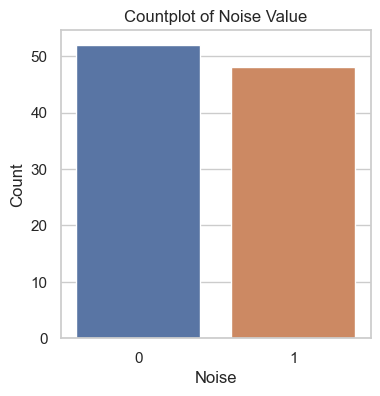

In [17]:
#노이즈 데이터 분포 확인
sns.set(style = 'whitegrid')
plt.figure(figsize = (4,4))
sns.countplot(x = 'Noise', data = df)
plt.xlabel('Noise')
plt.ylabel('Count')
plt.title('Countplot of Noise Value')
plt.show()

In [18]:
df['Noise'].value_counts()

Noise
0    52
1    48
Name: count, dtype: int64

### 2-3. Temperature

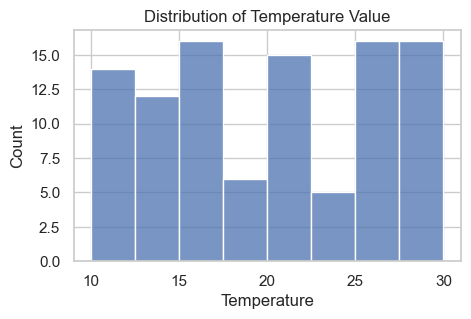

In [19]:
# Temperature 칼럼의 히스토그램 그리기
sns.set(style="whitegrid")
plt.figure(figsize=(5, 3))
sns.histplot(df['Temperature'])
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Distribution of Temperature Value')
plt.show()

### 2-4. Size

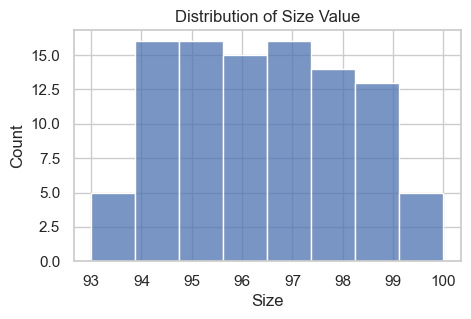

In [20]:
# Size 칼럼의 히스토그램 그리기
sns.set(style="whitegrid")
plt.figure(figsize=(5, 3))
sns.histplot(df['Size'])
plt.xlabel('Size')
plt.ylabel('Count')
plt.title('Distribution of Size Value')
plt.show()

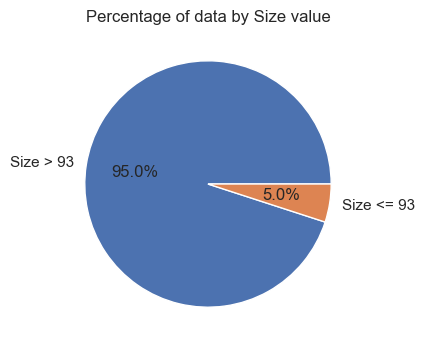

In [21]:
# 파이 차트 그리기
labels = ['Size > 93', 'Size <= 93']
sizes = [len(df[df['Size'] > 93]), len(df[df['Size'] <= 93])]
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Percentage of data by Size value')
plt.show()

## 3. 데이터 카테고리 추가하기

In [22]:
# cat_Stain 칼럼 추가
conditions = [
    (df['Stain'] >= 90),
    (df['Stain'] >= 80) & (df['Stain'] < 90)
]

values = ['see', 'complain']
df['cat_Stain'] = np.select(conditions, values, default='etc')

df.head()

,Stain,Noise,Temperature,Size,cat_Stain,cat_Size
0,99,0,12,93,see,Unavailable
1,98,0,21,93,see,Unavailable
2,97,0,15,94,see,Available
3,97,1,20,93,see,Unavailable
4,94,1,10,98,see,Available


In [23]:
# cat_Size 칼럼 추가
df['cat_Size'] = df['Size'].apply(lambda x: 'Unavailable' if x <= 93 else 'Available')

df.head()

,Stain,Noise,Temperature,Size,cat_Stain,cat_Size
0,99,0,12,93,see,Unavailable
1,98,0,21,93,see,Unavailable
2,97,0,15,94,see,Available
3,97,1,20,93,see,Unavailable
4,94,1,10,98,see,Available


## 4. 각 칼럼별 상관관계 파악하기

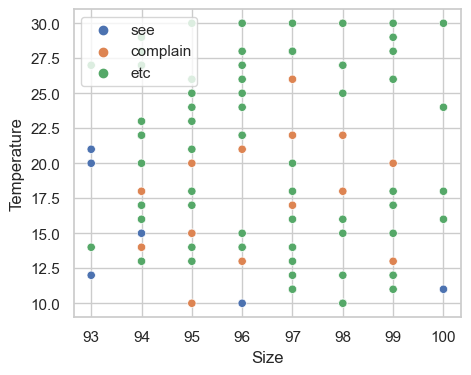

In [24]:
#Stain별 Size, Temperature
plt.figure(figsize=(5, 4))

sns.scatterplot(x='Size', y='Temperature', data=df, hue='cat_Stain')
plt.legend(loc='upper left')
plt.grid(True)

plt.show()

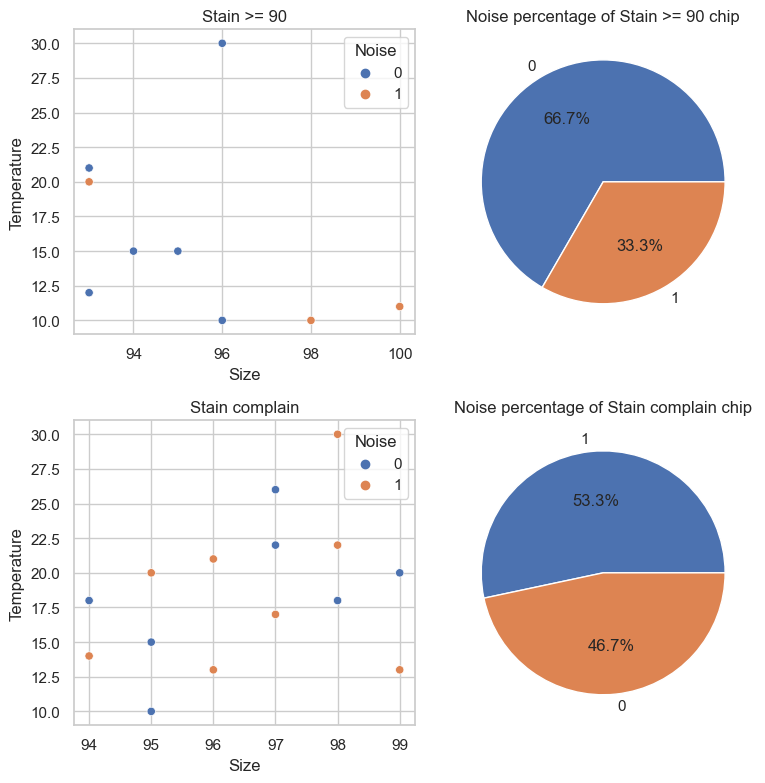

In [27]:
#Noise별 Stain 그룹에 따른 Size & Temperature
df_Stain_see = df[df.cat_Stain == 'see']
df_Stain_complain = df[df.cat_Stain == 'complain']

plt.figure(figsize=(8, 8))

plt.subplot(2,2,1)
sns.scatterplot(x='Size', y='Temperature', data=df_Stain_see, hue='Noise')
plt.grid(True)
plt.title('Stain >= 90')

plt.subplot(2,2,2)
plt.pie(df_Stain_see['Noise'].value_counts(), labels = df_Stain_see['Noise'].value_counts().index, autopct='%1.1f%%')
plt.title('Noise percentage of Stain >= 90 chip')

plt.subplot(2,2,3)
sns.scatterplot(x='Size', y='Temperature', data=df_Stain_complain, hue='Noise')
plt.grid(True)
plt.title('Stain complain')

plt.subplot(2,2,4)
plt.pie(df_Stain_complain['Noise'].value_counts(), labels = df_Stain_complain['Noise'].value_counts().index, autopct='%1.1f%%')
plt.title('Noise percentage of Stain complain chip')

plt.tight_layout()
plt.show()

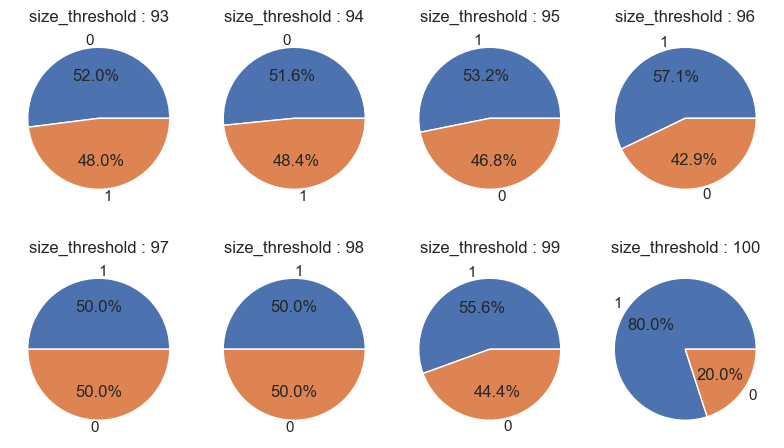

In [50]:
#Size threshold에 따른 Noise의 비율을 나타내는 pie chart
plt.figure(figsize=(8, 5))

for i in range(93,101):
    plt.subplot(2,4,i-92)
    plt.pie(df[df.Size >= i]['Noise'].value_counts(), labels = df[df.Size >= i]['Noise'].value_counts().index, autopct='%1.1f%%')
    plt.title(f"size_threshold : {i}")
plt.tight_layout()
plt.show()

(79, 6)


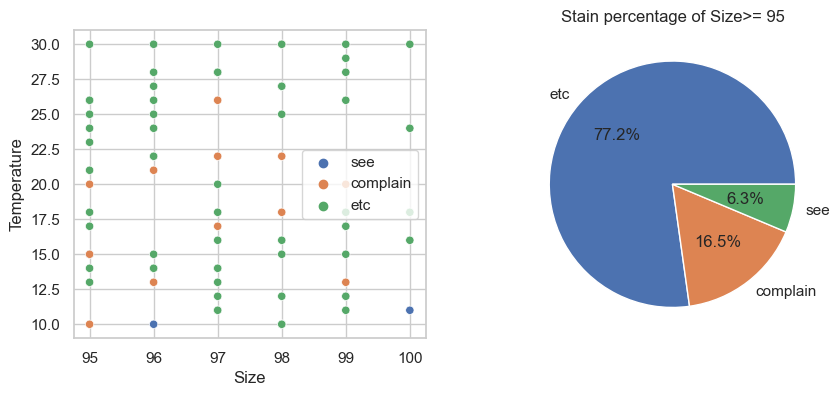

In [59]:
df_95 = df[df.Size >= 95]
print(df_95.shape)

plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
sns.scatterplot(x='Size', y='Temperature', data=df_95, hue='cat_Stain')
plt.legend(loc='best')
plt.grid(True)

plt.subplot(1,2,2)
plt.pie(df_95['cat_Stain'].value_counts(), labels = df_95['cat_Stain'].value_counts().index, autopct='%1.1f%%')
plt.title('Stain percentage of Size>= 95')


plt.show()

In [58]:
#수율확인
print(df[(df.Size >= 95) & (df.Stain >= 80)].shape)
print(df[(df.Size >= 95) & (df.Stain >= 90)].shape)
print(df[df.Size <= 93].shape)

(18, 6)
(5, 6)
(5, 6)


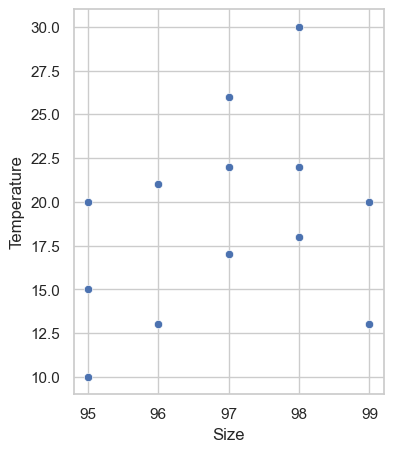

In [66]:
plt.figure(figsize=(4,5))
sns.scatterplot(x='Size', y='Temperature', data=df_95[df_95.cat_Stain == 'complain'])
plt.grid(True)
plt.show()

In [73]:
for thres in range(30,9,-1):
    df_95_complain = df_95[df_95.cat_Stain == 'complain']
    n = df_95_complain[df_95_complain.Temperature >= thres].shape[0]
    print(f"Tempertaure thres가 {thres}일 때 수율 : {1-(n+10)/100}")

Tempertaure thres가 30일 때 수율 : 0.89
Tempertaure thres가 29일 때 수율 : 0.89
Tempertaure thres가 28일 때 수율 : 0.89
Tempertaure thres가 27일 때 수율 : 0.89
Tempertaure thres가 26일 때 수율 : 0.88
Tempertaure thres가 25일 때 수율 : 0.88
Tempertaure thres가 24일 때 수율 : 0.88
Tempertaure thres가 23일 때 수율 : 0.88
Tempertaure thres가 22일 때 수율 : 0.86
Tempertaure thres가 21일 때 수율 : 0.85
Tempertaure thres가 20일 때 수율 : 0.83
Tempertaure thres가 19일 때 수율 : 0.83
Tempertaure thres가 18일 때 수율 : 0.8200000000000001
Tempertaure thres가 17일 때 수율 : 0.81
Tempertaure thres가 16일 때 수율 : 0.81
Tempertaure thres가 15일 때 수율 : 0.8
Tempertaure thres가 14일 때 수율 : 0.8
Tempertaure thres가 13일 때 수율 : 0.78
Tempertaure thres가 12일 때 수율 : 0.78
Tempertaure thres가 11일 때 수율 : 0.78
Tempertaure thres가 10일 때 수율 : 0.77
